# Assignment 6: GMM for realtime datapoints

In [1]:
#Libraries required for my code to run
from GMMlibrary import GaussianMixture
#Uncomment this if you want to display your [graphs] within the notebook in a proper format.
%matplotlib inline
#Uncomment this if you want to display your graphs in backend


import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from pandas import DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import glob
import sys

import warnings
warnings.filterwarnings('ignore')


# Image Segmentation

Image segmentation is the process of partitioning an image into multiple segments. Image segmentation is typically used to locate objects and boundaries in images.

There are many other applications where Image segmentation is transforming industries:

* Traffic Control Systems
* Self Driving Cars
* Locating objects in satellite images


### Image Segmentation using GMM

In [2]:
from PIL import Image  # To use this PILLOW package, pip install Pillow==2.2.2

array([[[  3, 196, 255],
        [  3, 196, 255],
        [  3, 196, 255],
        ...,
        [  0, 174, 235],
        [  0, 175, 235],
        [  0, 175, 235]],

       [[  2, 195, 254],
        [  2, 195, 254],
        [  2, 195, 254],
        ...,
        [  0, 175, 235],
        [  0, 174, 235],
        [  0, 175, 235]],

       [[  3, 193, 251],
        [  3, 193, 251],
        [  3, 193, 251],
        ...,
        [  0, 175, 238],
        [  1, 175, 238],
        [  1, 175, 238]],

       ...,

       [[169, 190,  97],
        [183, 204, 111],
        [178, 199, 106],
        ...,
        [149, 122, 103],
        [155, 129, 114],
        [158, 132, 117]],

       [[169, 189, 100],
        [186, 207, 116],
        [175, 198, 107],
        ...,
        [150, 123, 106],
        [145, 117, 103],
        [149, 123, 108]],

       [[177, 199, 116],
        [179, 201, 116],
        [180, 202, 117],
        ...,
        [153, 126, 109],
        [156, 128, 114],
        [175, 147, 133]]

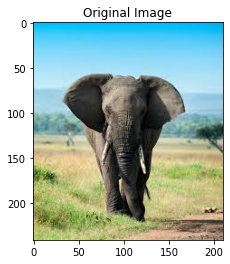

In [3]:

img = np.array(Image.open('elephant(1).jpeg'));img.shape
plt.title('Original Image')
plt.imshow(img)
img

In [4]:

img_reshapedto2D= img.reshape((-1,3));
X=img_reshapedto2D
#Initial_Centroid=Data.mean(0)
#print(Initial_Centroid)
print('Shape of resized Image:',img_reshapedto2D.shape)
print(img_reshapedto2D)


Shape of resized Image: (50610, 3)
[[  3 196 255]
 [  3 196 255]
 [  3 196 255]
 ...
 [153 126 109]
 [156 128 114]
 [175 147 133]]


...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -800596.607677584
Iteration:  1   log_likelihood:  -757136.7727360068
Iteration:  2   log_likelihood:  -729041.7136587854
Iteration:  3   log_likelihood:  -708610.5844745873
Iteration:  4   log_likelihood:  -696497.8287499797
Iteration:  5   log_likelihood:  -689781.7937396651
Iteration:  6   log_likelihood:  -685675.2998986827
Iteration:  7   log_likelihood:  -677405.7233455135
Iteration:  8   log_likelihood:  -666594.0373399827
Iteration:  9   log_likelihood:  -664557.8814612931
Iteration:  10   log_likelihood:  -663171.5186089567
Iteration:  11   log_likelihood:  -661271.2694463752
Iteration:  12   log_likelihood:  -658641.6041460346
Iteration:  13   log_likelihood:  -657403.5033631948
Iteration:  14   log_likelihood:  -657248.0075261323
Iteration:  15   log_likelihood:  -657211.952073532
Iteration:  16   log_likelihood:  -657195.3360789759
Iteration:  17   log_likelihood:  -657186.1884019973
Iteration:  18   log_likeli

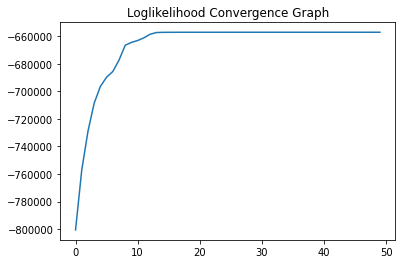

In [5]:
K=4
#Number of Gaussian components
model = GaussianMixture(gaussians=K, n_iters = 50, tol = 0, seed = 4)
fitted_values = model.fit(X)
label_values = model.predict(X)
print(label_values)

(241, 210)
[1 1 1 ... 3 3 3]


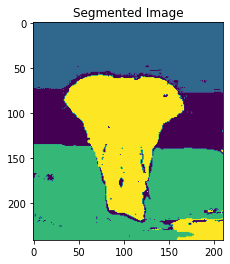

In [6]:

final_segmented_image = label_values.reshape(img.shape[0],img.shape[1]);
print(final_segmented_image.shape)
plt.title('Segmented Image')
plt.imshow(final_segmented_image)
print(label_values)

In [7]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = K, covariance_type = 'full', 
                      max_iter = 600, random_state = 3)

gmm.fit(X)

print('Likelihood converged or not: ', gmm.converged_)



Likelihood converged or not:  True


Verification wrt Original GMM Algorithm

In [8]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=K,covariance_type='full').fit(X)

In [9]:
segmentation = model.predict(img_reshapedto2D)

(241, 210)
[1 1 1 ... 0 0 0]


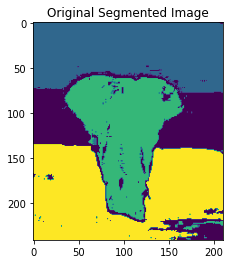

In [10]:
final_segmented_image1 = segmentation.reshape(img.shape[0],img.shape[1]);
print(final_segmented_image1.shape)
plt.title('Original Segmented Image')
plt.imshow(final_segmented_image1)
print(segmentation)

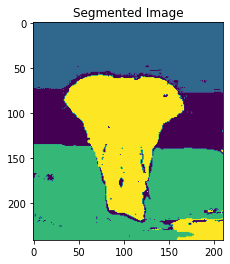

[1 1 1 ... 3 3 3]
[1 1 1 ... 0 0 0]


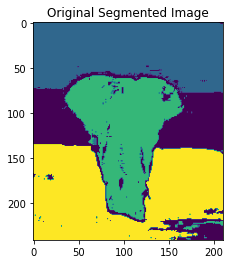

In [11]:
plt.title('Segmented Image')
plt.imshow(final_segmented_image)
plt.show()
print(label_values)

plt.title('Original Segmented Image')
plt.imshow(final_segmented_image1)

print(segmentation)

In [12]:
Classification=[]
ClassificationRate=[]

val_old=[0,1, 2, 3]
val_new=[0,1,3,2]
a = label_values
my_dict = dict(zip(val_old, val_new))
label_values = [my_dict.get(x,x) for x in a]

def accuracy(inp,target,axis=-1):
       
    percentage=(np.sum(inp == target)/len(label_values))*100
    #Classification.append(K)
    #ClassificationRate.append(percentage)
    
    return percentage
accuracy(segmentation,label_values)

96.36830665876309

In [13]:
a

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

Text(0.5, 1.0, 'Histogram')

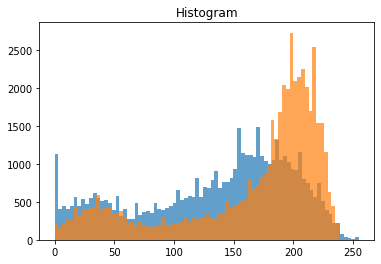

In [14]:
def plot_hist(data):
    for x in data:
        plt.hist(x, bins = 80, alpha = 0.7)

plot_hist([img_reshapedto2D[:, 0], img_reshapedto2D[:, 1]])
plt.title("Histogram")


 Iteration:  1
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -834493.3991411098
Iteration:  1   log_likelihood:  -787414.838387242
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


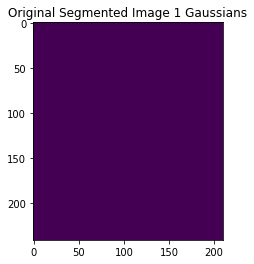

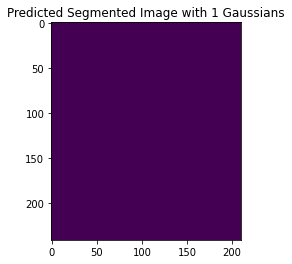


 Iteration:  2
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -798086.6102037544
Iteration:  1   log_likelihood:  -769594.9317141857
Iteration:  2   log_likelihood:  -752153.2162984872
Iteration:  3   log_likelihood:  -741703.2796263834
Iteration:  4   log_likelihood:  -736620.4509119353
Iteration:  5   log_likelihood:  -733995.357159057
Iteration:  6   log_likelihood:  -733431.6699678227
Iteration:  7   log_likelihood:  -733089.2428359984
Iteration:  8   log_likelihood:  -732715.0385932554
Iteration:  9   log_likelihood:  -732249.4182547586
Iteration:  10   log_likelihood:  -731718.0268792318
Iteration:  11   log_likelihood:  -731237.4490909548
Iteration:  12   log_likelihood:  -730960.4706415881
Iteration:  13   log_likelihood:  -730814.7730274802
Iteration:  14   log_likelihood:  -730730.3057194374
Iteration:  15   log_likelihood:  -730676.0759239015
Iteration:  16   log_likelihood:  -730639.5678142841
Iteration:  17   log_likelihood:  -730614.4693812884
Iteration:

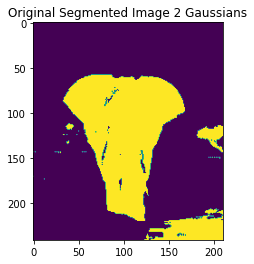

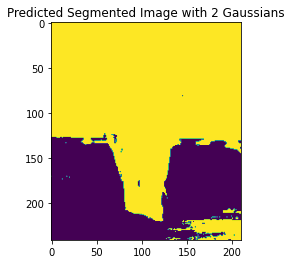


 Iteration:  3
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -810335.2452755994
Iteration:  1   log_likelihood:  -762858.9808497578
Iteration:  2   log_likelihood:  -739004.1798992303
Iteration:  3   log_likelihood:  -729143.9091958897
Iteration:  4   log_likelihood:  -726261.8958197922
Iteration:  5   log_likelihood:  -724151.8569081421
Iteration:  6   log_likelihood:  -722275.5610401876
Iteration:  7   log_likelihood:  -720555.2271610843
Iteration:  8   log_likelihood:  -718914.1127478513
Iteration:  9   log_likelihood:  -717344.9982665379
Iteration:  10   log_likelihood:  -715898.2500694137
Iteration:  11   log_likelihood:  -714656.837912252
Iteration:  12   log_likelihood:  -713650.9716955513
Iteration:  13   log_likelihood:  -712804.3795082604
Iteration:  14   log_likelihood:  -712046.5199885226
Iteration:  15   log_likelihood:  -711409.1709596495
Iteration:  16   log_likelihood:  -710961.3277199969
Iteration:  17   log_likelihood:  -710688.6990430034
Iteration:

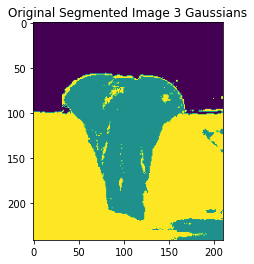

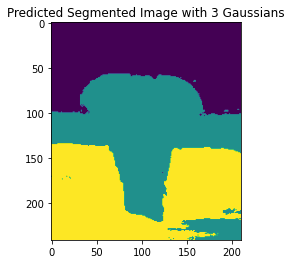


 Iteration:  4
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -800596.607677584
Iteration:  1   log_likelihood:  -757136.7727360068
Iteration:  2   log_likelihood:  -729041.7136587854
Iteration:  3   log_likelihood:  -708610.5844745873
Iteration:  4   log_likelihood:  -696497.8287499797
Iteration:  5   log_likelihood:  -689781.7937396651
Iteration:  6   log_likelihood:  -685675.2998986827
Iteration:  7   log_likelihood:  -677405.7233455135
Iteration:  8   log_likelihood:  -666594.0373399827
Iteration:  9   log_likelihood:  -664557.8814612931
Iteration:  10   log_likelihood:  -663171.5186089567
Iteration:  11   log_likelihood:  -661271.2694463752
Iteration:  12   log_likelihood:  -658641.6041460346
Iteration:  13   log_likelihood:  -657403.5033631948
Iteration:  14   log_likelihood:  -657248.0075261323
Iteration:  15   log_likelihood:  -657211.952073532
Iteration:  16   log_likelihood:  -657195.3360789759
Iteration:  17   log_likelihood:  -657186.1884019973
Iteration: 

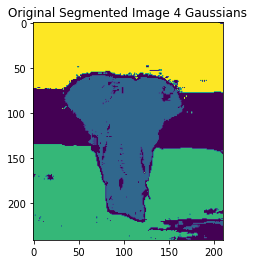

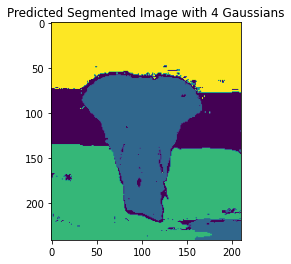


 Iteration:  5
...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -799495.9157168737
Iteration:  1   log_likelihood:  -757847.6368283392
Iteration:  2   log_likelihood:  -729918.9359367167
Iteration:  3   log_likelihood:  -707507.2557124658
Iteration:  4   log_likelihood:  -693789.9222457208
Iteration:  5   log_likelihood:  -688148.8103408744
Iteration:  6   log_likelihood:  -682926.061694995
Iteration:  7   log_likelihood:  -671003.4465502782
Iteration:  8   log_likelihood:  -663611.3530387199
Iteration:  9   log_likelihood:  -659676.4138104563
Iteration:  10   log_likelihood:  -656045.3053167444
Iteration:  11   log_likelihood:  -654829.5015162411
Iteration:  12   log_likelihood:  -654584.8489340121
Iteration:  13   log_likelihood:  -654473.9479643931
Iteration:  14   log_likelihood:  -654405.726659872
Iteration:  15   log_likelihood:  -654360.1424541804
Iteration:  16   log_likelihood:  -654329.5131319902
Iteration:  17   log_likelihood:  -654309.2319661574
Iteration: 

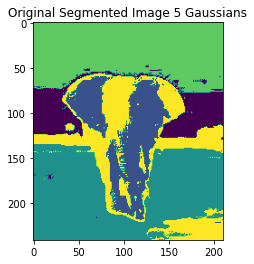

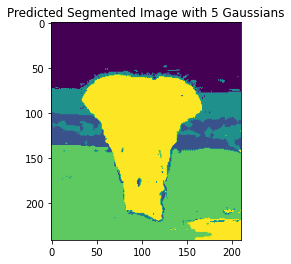

In [50]:
Classification=[]
ClassificationRate=[]

for i in range(1,6):
    
    #Original Values using Inbuilt GMM
    
    print("\n Iteration: ",i)
    
    gmm = mixture.GaussianMixture(n_components = i, covariance_type = 'full', 
                      max_iter = 600, random_state = 3)

    gmm.fit(X)
    original = gmm.predict(img_reshapedto2D)
    original_image = original.reshape(img.shape[0],img.shape[1]);
       
    
    
    #Original Values using Inbuilt GMM
    
    model = GaussianMixture(gaussians=i, n_iters = 600, tol = 0.001, seed = 4)
    fitted_values = model.fit(X)
    predicted = np.array(model.predict(X))

       

    if i == 2:
        val_old=[0,1]
        val_new=[0,1]       
        my_dict = dict(zip(val_old, val_new))
        predicted = [my_dict.get(x,x) for x in predicted]    
    

    
    if i == 3:
        val_old=[0,1,2]
        val_new=[0,1,2]
        a = predicted
        my_dict = dict(zip(val_old, val_new))
        predicted = [my_dict.get(x,x) for x in a]
        
    elif i == 4:
        val_old=[0,1,2, 3]
        val_new=[0,3,2,1]
        a = predicted
        my_dict = dict(zip(val_old, val_new))
        predicted = [my_dict.get(x,x) for x in a]
        
    elif i ==5:
        val_old=[0,1,2,3,4]
        val_new=[1,0,3,4,2]
        a = predicted
        my_dict = dict(zip(val_old, val_new))
        predicted = [my_dict.get(x,x) for x in a]
    
    print(original)
    print(np.array(predicted))
   
    predicted_image = np.array(predicted).reshape(img.shape[0],img.shape[1]);
    plt.title(f'Original Segmented Image {i} Gaussians')
    plt.imshow(original_image)
    plt.show()
    
    plt.title(f'Predicted Segmented Image with {i} Gaussians')
    plt.imshow(predicted_image)
    plt.show()
   
 
    
    Classification.append(i)
    ClassificationRate.append(accuracy(original,predicted))
    

[1, 2, 3, 4, 5] [100.0, 59.932819600869394, 88.44892313771982, 96.35249950602648, 11.780280576961074]


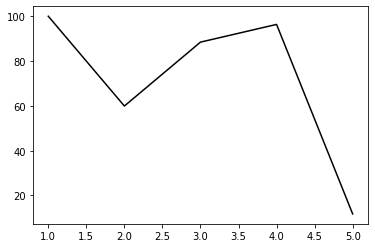

In [51]:
print(Classification,ClassificationRate)
plt.plot(Classification,ClassificationRate,'k')